In [61]:
import pandas as pd 
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df_naver_bangkok_26 = pd.read_csv("/home/dyjung/amr_ws/eda/data/eda_project/final_naver_data/final_bangkok_26_naver.csv")
df_naver_bangkok_27 = pd.read_csv("/home/dyjung/amr_ws/eda/data/eda_project/final_naver_data/final_bangkok_27_naver.csv")
df_naver_danang_26 = pd.read_csv("/home/dyjung/amr_ws/eda/data/eda_project/final_naver_data/final_danang_26_naver.csv")
df_naver_danang_27 = pd.read_csv("/home/dyjung/amr_ws/eda/data/eda_project/final_naver_data/final_danang_27_naver.csv")
df_naver_osaka_26 = pd.read_csv("/home/dyjung/amr_ws/eda/data/eda_project/final_naver_data/final_osaka_26_naver.csv")
df_naver_osaka_27 = pd.read_csv("/home/dyjung/amr_ws/eda/data/eda_project/final_naver_data/final_osaka_27_naver.csv")



#### 네이버 항공권 데이터의 시간대별 가격 차이 보기 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


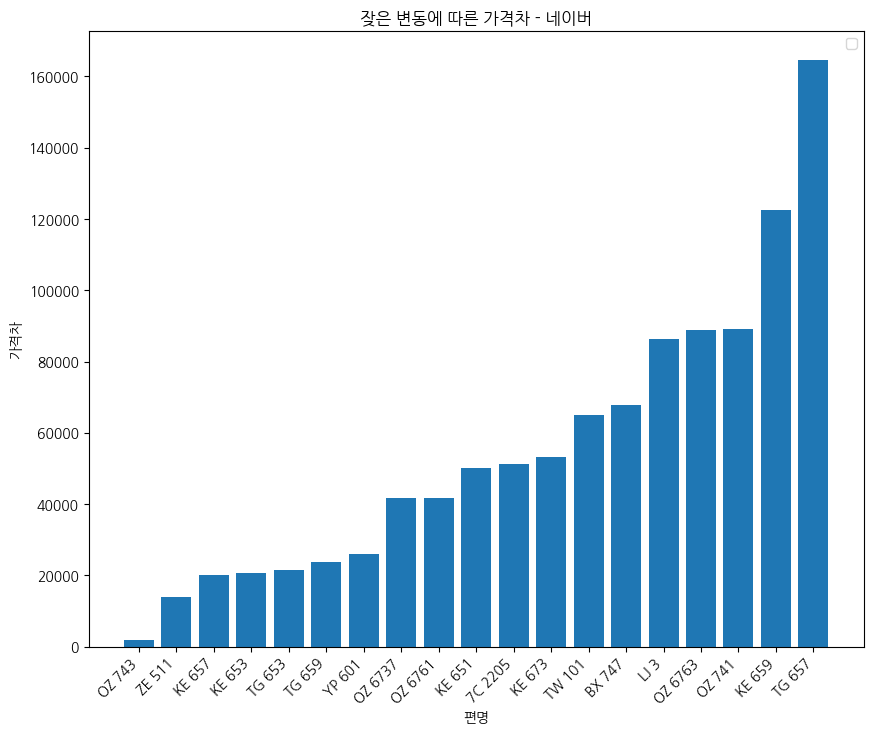

In [63]:
import koreanize_matplotlib
df_naver_bangkok_26["추출시간"] = pd.to_datetime(df_naver_bangkok_26["추출시간"])

uniq_fn_count = len(df_naver_bangkok_26["편명"].unique()) #19개



price_list = []
fn_uniq_list = []

for value in df_naver_bangkok_26["편명"].unique():

    tmp_df = df_naver_bangkok_26[df_naver_bangkok_26["편명"] == value ]

    min_value = tmp_df['가격'].min()
    max_value = tmp_df['가격'].max()

    gap = max_value - min_value

    fn_uniq_list.append(value)
    price_list.append(gap)


plt.figure(figsize=(10,8))

data = {"편명" : fn_uniq_list,
        "가격차" : price_list}

df_price_list = pd.DataFrame(data)


df_price_list = df_price_list.sort_values(by="가격차", ascending=True)

plt.bar(df_price_list["편명"], df_price_list["가격차"])

plt.xticks(rotation=45, ha='right') 
# plt.xticks(value['추출시간'][::30], rotation=45) 
# plt.ylim(-0.25, 1.25)  # 원하는 범위로 설정
plt.title('잦은 변동에 따른 가격차 - 네이버')
plt.xlabel('편명')
plt.ylabel('가격차')
plt.legend(loc = "upper right")
plt.show()

In [64]:
df_naver_bangkok_26.head()

,항공사,출발시간,출발공항,도착시간,도착공항,비행방식,소요시간,편도/왕복,가격,추출시간,편명,비행일자,사이트
0,제주항공,21:35,ICN,01:25,BKK,직항,05시간 50분,편도,401222,2024-01-20 00:00:00,7C 2205,24.01.26(금),naver
1,제주항공,21:35,ICN,01:25,BKK,직항,05시간 50분,편도,401222,2024-01-20 00:30:00,7C 2205,24.01.26(금),naver
2,제주항공,21:35,ICN,01:25,BKK,직항,05시간 50분,편도,401222,2024-01-20 01:00:00,7C 2205,24.01.26(금),naver
3,제주항공,21:35,ICN,01:25,BKK,직항,05시간 50분,편도,402200,2024-01-20 01:30:00,7C 2205,24.01.26(금),naver
4,제주항공,21:35,ICN,01:25,BKK,직항,05시간 50분,편도,401222,2024-01-20 02:00:00,7C 2205,24.01.26(금),naver


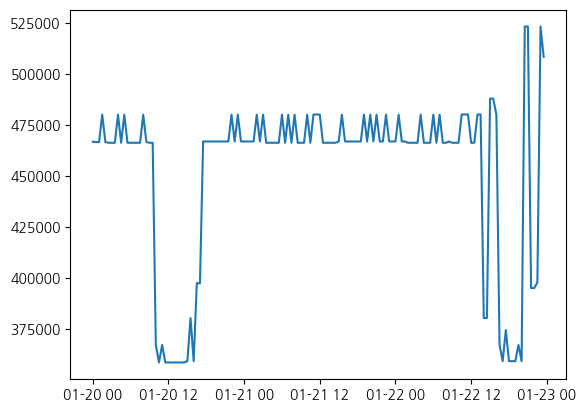

In [65]:
df_som_wrong = df_naver_bangkok_26[(df_naver_bangkok_26["편명"] == "TG 657")]

df_som_wrong.reset_index(drop=True, inplace=True)
plt.plot(df_som_wrong["추출시간"], df_som_wrong["가격"] )


13866

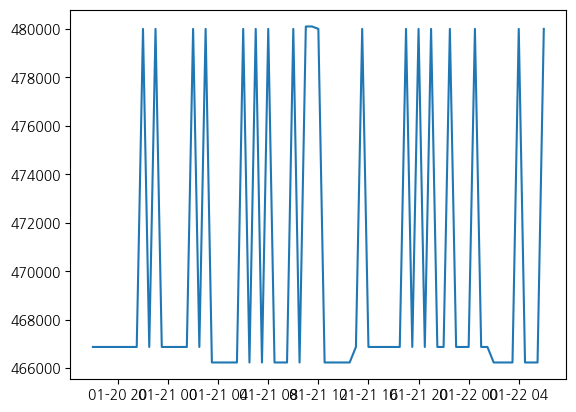

In [66]:
from_time = pd.to_datetime("2024-01-20 18:00:00")
to_time = pd.to_datetime("2024-01-22 06:00:00")

df_som_wrong = df_naver_bangkok_26[(df_naver_bangkok_26["편명"] == "TG 657")]

df_som_wrong_time_limit = df_som_wrong[df_som_wrong["추출시간"].between(from_time, to_time)] 
df_som_wrong_time_limit.reset_index(drop=True, inplace=True)
plt.plot(df_som_wrong_time_limit["추출시간"], df_som_wrong_time_limit["가격"] )

min_value = df_som_wrong_time_limit['가격'].min()
max_value = df_som_wrong_time_limit['가격'].max()

gap = max_value - min_value
gap

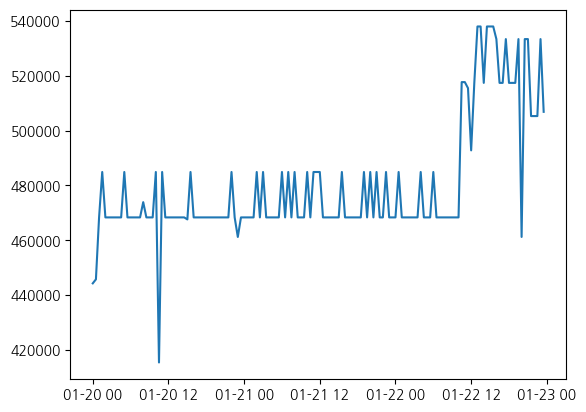

In [67]:
df_test = df_naver_bangkok_26[(df_naver_bangkok_26["편명"] == "KE 659")]

df_test.reset_index(drop=True, inplace=True)
plt.plot(df_test["추출시간"], df_test["가격"] )

23700

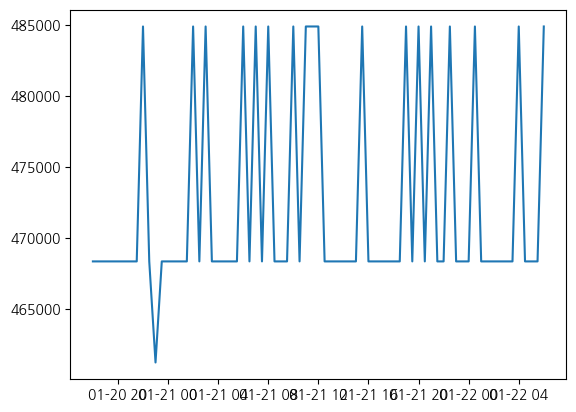

In [68]:
from_time = pd.to_datetime("2024-01-20 18:00:00")
to_time = pd.to_datetime("2024-01-22 06:00:00")

df_som_wrong = df_naver_bangkok_26[(df_naver_bangkok_26["편명"] == "KE 659")]

df_som_wrong_time_limit = df_som_wrong[df_som_wrong["추출시간"].between(from_time, to_time)] 
df_som_wrong_time_limit.reset_index(drop=True, inplace=True)
plt.plot(df_som_wrong_time_limit["추출시간"], df_som_wrong_time_limit["가격"] )

min_value = df_som_wrong_time_limit['가격'].min()
max_value = df_som_wrong_time_limit['가격'].max()

gap = max_value - min_value
gap

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


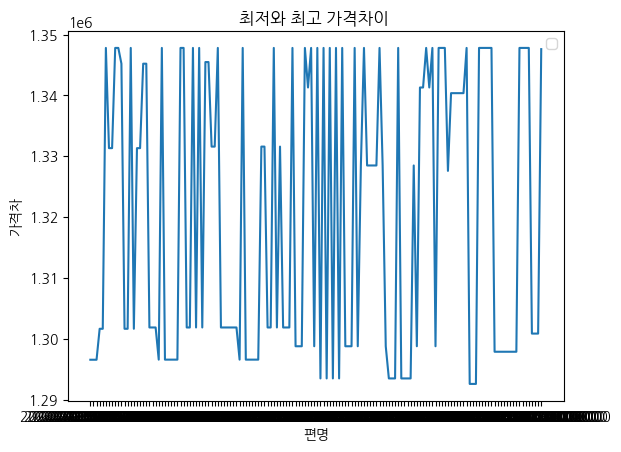

In [69]:
#변동률 그래프로 보니까 VN 3441 그래프의 출렁임이 엄청나네 



df_test = df_naver_danang_27[(df_naver_danang_27["편명"] == "VN 3441")]

# df_som_wrong_time_limit = df_som_wrong[df_som_wrong["추출시간"].between(from_time, to_time)] 
df_test.reset_index(drop=True, inplace=True)
plt.plot(df_test["추출시간"], df_test["가격"] )

df_test

min_value = df_test['가격'].min()
max_value = df_test['가격'].max()

gap = max_value - min_value
gap

plt.title('최저와 최고 가격차이 ')
plt.xlabel('편명')
plt.ylabel('가격차')
plt.legend(loc = "upper right")
plt.show()



In [70]:
df_test, min_value, max_value


(       항공사   출발시간 출발공항   도착시간 도착공항 비행방식      소요시간 편도/왕복       가격  \
 0    베트남항공  18:30  ICN  21:45  DAD   직항  05시간 15분    편도  1296538   
 1    베트남항공  18:30  ICN  21:45  DAD   직항  05시간 15분    편도  1296538   
 2    베트남항공  18:30  ICN  21:45  DAD   직항  05시간 15분    편도  1296538   
 3    베트남항공  18:30  ICN  21:45  DAD   직항  05시간 15분    편도  1301628   
 4    베트남항공  18:30  ICN  21:45  DAD   직항  05시간 15분    편도  1301628   
 ..     ...    ...  ...    ...  ...  ...       ...   ...      ...   
 141  베트남항공  18:30  ICN  21:45  DAD   직항  05시간 15분    편도  1347800   
 142  베트남항공  18:30  ICN  21:45  DAD   직항  05시간 15분    편도  1300838   
 143  베트남항공  18:30  ICN  21:45  DAD   직항  05시간 15분    편도  1300838   
 144  베트남항공  18:30  ICN  21:45  DAD   직항  05시간 15분    편도  1300838   
 145  베트남항공  18:30  ICN  21:45  DAD   직항  05시간 15분    편도  1347600   
 
                     추출시간       편명         비행일자    사이트  
 0    2024-01-20 00:00:00  VN 3441  24.01.27(토)  naver  
 1    2024-01-20 00:30:00  VN 3441  24.01.27(토)  naver  

In [71]:
df_test_min = df_test[df_test["가격"] == min_value]
df_test_min.reset_index(drop= True, inplace= True)
df_test_min
min_time = df_test_min["추출시간"][0]
min_time



'2024-01-22 13:00:00'

In [72]:
df_test_max = df_test[df_test["가격"] == max_value]
df_test_max.reset_index(drop= True, inplace= True)
df_test_max
max_time = df_test_max["추출시간"][29]
max_time


'2024-01-22 12:30:00'

#### 최고, 처저가 시각화해 보기 

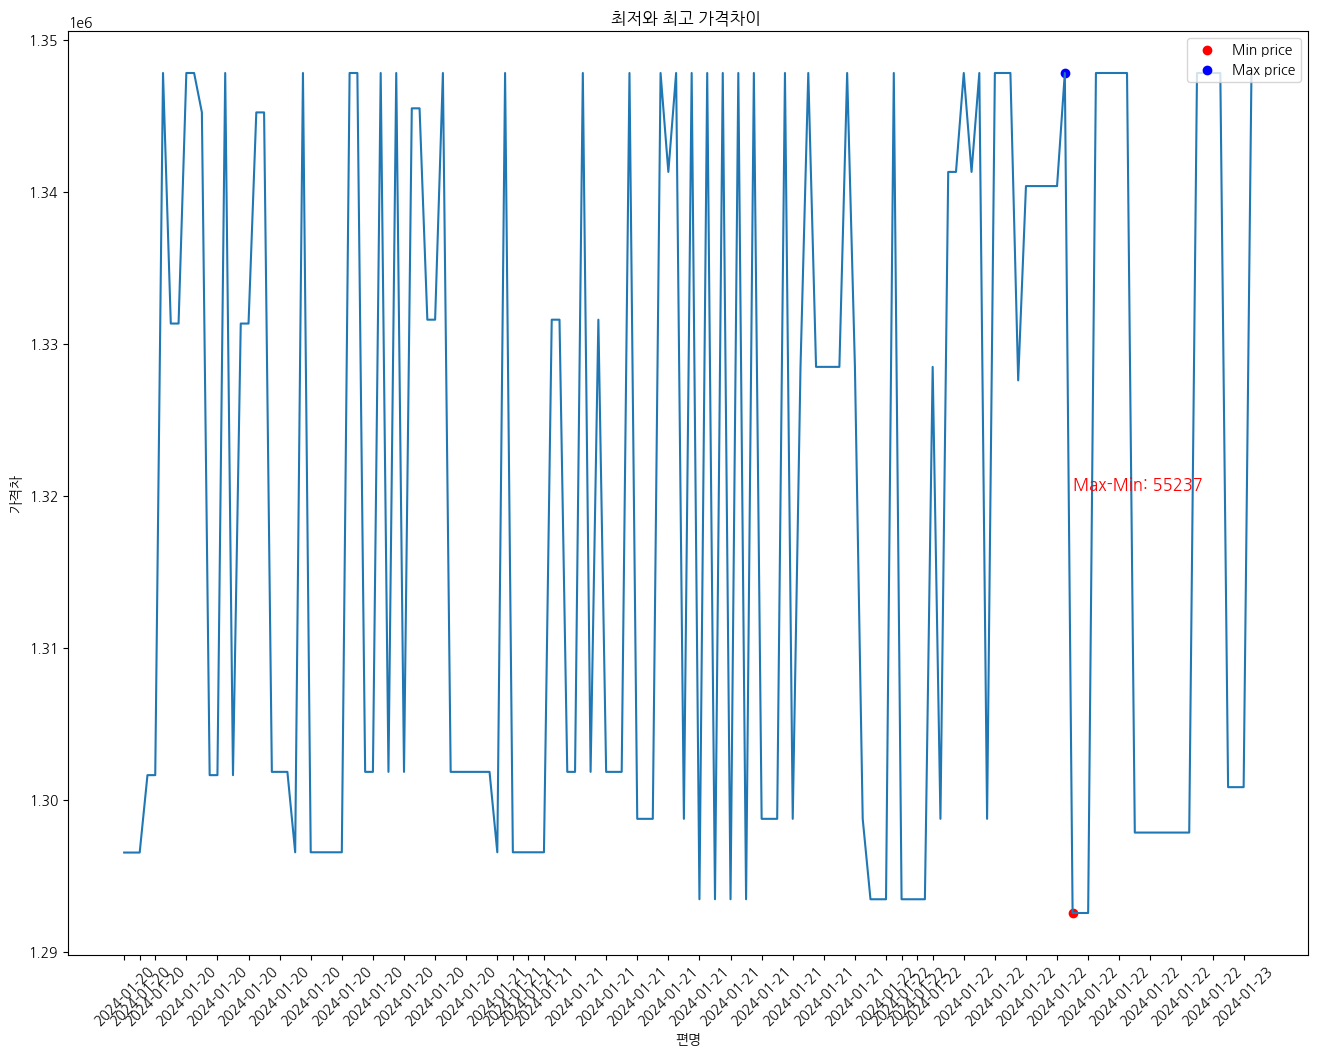

In [89]:
#변동률 그래프로 보니까 VN 3441 그래프의 출렁임이 엄청나네 , 최고, 최저가 점 찍기 

df_naver_danang_27["추출시간"] = pd.to_datetime(df_naver_danang_27["추출시간"])


df_test = df_naver_danang_27[(df_naver_danang_27["편명"] == "VN 3441")]

# df_som_wrong_time_limit = df_som_wrong[df_som_wrong["추출시간"].between(from_time, to_time)] 
df_test.reset_index(drop=True, inplace=True)

plt.figure(figsize=(16,12))


plt.plot(df_test["추출시간"], df_test["가격"] )

plt.scatter(pd.to_datetime(min_time), min_value, color='red', label='Min price')
plt.scatter(pd.to_datetime(max_time), max_value, color='blue', label='Max price')

plt.xticks(df_naver_danang_27['추출시간'][::50], rotation=45) 

gap = max_value - min_value

target_value = (max_value+min_value)/2
plt.text(pd.to_datetime(min_time), target_value, f'Max-Min: {gap}', color='red', fontsize=12, ha='left', va='bottom')


plt.title('최저와 최고 가격차이 ')
plt.xlabel('편명')
plt.ylabel('가격차')
plt.legend(loc = "upper right")
plt.show()

